<a href="https://colab.research.google.com/github/tranitapalmer/DS-Unit-1-Sprint-2-Statistics/blob/master/Tranita_Palmer_LS_DS17_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv', na_values=' ?')
print(df.shape)
df.head()

(2761, 15)


,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [0]:
sample1 = df.sample(20, random_state=42)

sample2 = df.sample(200, random_state=42)

In [21]:
ConvertedSalary = np.random.binomial(n=1, p=.5, size=20)

ConvertedSalary.mean()

0.45

In [18]:
ConvertedSalary = np.random.binomial(n=1, p=.5, size=200)

ConvertedSalary.mean()

0.49

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [22]:
sample1['ConvertedSalary'].mean()

55752.2

In [23]:
sample2['ConvertedSalary'].mean()

68551.255

**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

These sample means both fall outside of our confidence interval, so I will "REJECT" our null hypothesis. Neither one can be trusted. However, Sample one can be more trusted than sample two because it estimate is closer to the underlying population value.


**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

The standard error is dependent on sample size: larger sample sizes produce smaller standard errors, which estimate population parameters with higher precision. Because the sample is not close we need to test more samples to increase the certainty of their estimates.

**What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



I would use Systematic sampling because it is frequently used to select a specified number of records from a computer file or Stratified sampling because it is commonly used for probability method that is superior to random sampling because it reduces sampling error which can give non-technical readers an idea about how far off our estimates might be due to sampling error.

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [24]:
from scipy import stats

def confidence_interval(data, confidence=.95):
  # Make sure we're working with a numpy array
  sample = np.array(data)
  # Sample Mean
  x_bar = sample.mean()
  # Sample Standard Deviation
  s = np.std(sample, ddof=1)
  # Sample Size
  n = len(sample)
  # T statistic - correspond to our confidence level, and our degrees of freedom
  t = stats.t.ppf((1+confidence) / 2, n-1)
  # Standard Error
  std_err = s / np.sqrt(n)
  # Margin of Error
  moe = std_err * t
  # Lower and Upper Bound
  upper = x_bar + moe
  lower = x_bar - moe

  return (lower, x_bar, upper)

confidence_interval(sample1['ConvertedSalary'])

(35805.10309625536, 55752.2, 75699.29690374463)

In [26]:
def confidence_interval(data, confidence=.95):
  # Make sure we're working with a numpy array
  sample = pd.Series(data)
  # Sample Mean
  x_bar = sample.mean()
  # Sample Standard Deviation
  s = sample.std()
  # Sample Size
  n = len(sample)
  # T statistic - correspond to our confidence level, and our degrees of freedom
  t = stats.t.ppf((1+confidence) / 2, n-1)
  # Standard Error
  std_err = s / np.sqrt(n)
  # Margin of Error
  moe = std_err * t
  # Lower and Upper Bound
  upper = x_bar + moe
  lower = x_bar - moe

  return (lower, x_bar, upper)

confidence_interval(sample1['ConvertedSalary'])

(35805.10309625536, 55752.2, 75699.29690374463)

In [27]:
confidence = .95

(1+confidence) / 2

0.975

**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [28]:
CI1 = confidence_interval(sample1['ConvertedSalary'])
CI1

(35805.10309625536, 55752.2, 75699.29690374463)

In [29]:
CI2 = confidence_interval(sample2['ConvertedSalary'])
CI2

(60593.058804479086, 68551.255, 76509.45119552092)

In [30]:
print("ConvertedSalary")
print("Mean:", CI1[1])
print("MOE:", CI1[2]-CI1[1])

ConvertedSalary
Mean: 55752.2
MOE: 19947.096903744634


In [31]:
print("ConvertedSalary")
print("Mean:", CI2[1])
print("MOE:", CI2[2]-CI2[1])

ConvertedSalary
Mean: 68551.255
MOE: 7958.196195520912


The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

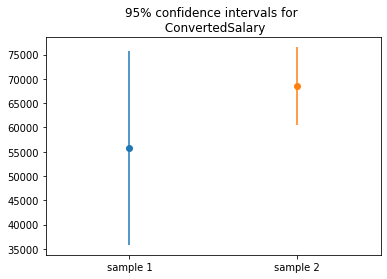

In [32]:
plt.errorbar(x=0, y=CI1[1], yerr=(CI1[2]-CI1[1]), fmt='o')
plt.errorbar(x=1, y=CI2[1], yerr=(CI2[2]-CI2[1]), fmt='o')
plt.title('95% confidence intervals for \n ConvertedSalary')
plt.xticks(ticks=[0,1], labels=['sample 1', 'sample 2'])
plt.xlim(-.5, 1.5)
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

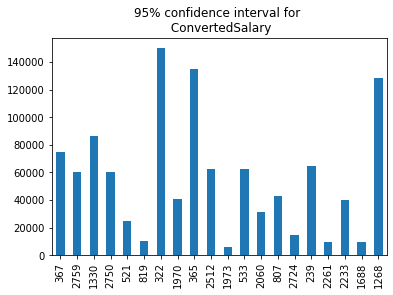

In [33]:
sample1['ConvertedSalary'].plot.bar()
plt.axvline(CI1[0], color='black')
plt.axvline(CI1[1], color='red')
plt.axvline(CI1[2], color='black')
plt.title('95% confidence interval for \n ConvertedSalary')
plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [34]:
confidence = .95

(1+confidence) / 2

0.975

The estimate is pretty close.

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**


Accuracy refers to the closeness of a measured value to a standard or known value and precision refers to the closeness of two or more measurements to each other.

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

One very common misunderstanding that is often made about a confidence interval at a 95% level is that there is a 95% chance that the confidence interval contains the true mean of the population. The reason that this is a mistake is The key idea pertaining to a confidence interval is that the probability used enters the picture with the method that is used, in determining confidence interval is that it refers to the method that is used.

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.